# 計算の原子

## はじめに

量子コンピューターのプログラミングは、今や誰もが自宅にいながらできるようになりました。でも、何を作れば良いのでしょう？量子プログラムって何でしょう？そもそも量子コンピューターって何？

これらの疑問は、今日の標準のデジタルコンピューターと比較することで回答できます。残念ながら、ほとんどの人は実際にデジタルコンピューターの動作を理解していません。この記事では、まずはデジタルコンピューターの基本原則から見ていきます。その後、量子コンピューティングの話にスムーズに移行できるよう、量子コンピューティング上での計算を行うときと同じツールを使用して実行します。

## 情報をビットに分割する

まず知っておかなければならないのは、 _ビット_ という概念です。これは世界で最も単純なアルファベットとして設計されています。0と1という2つの記号だけで、あらゆる情報を表現することができるのです。

その一例が数字です。皆さんは、0, 1, 2, 3, 4, 5, 6, 7, 8, 9の10個の数字の [文字列](gloss:string) で数字を表すことに慣れていることでしょう。この数字の文字列では、各桁が、ある10の [べき乗](gloss:power) を何回含んでいるかを表します。例えば、213と書くと、次のような意味になります。

$$ 200+10+3 $$

または、10の位を強調するような表現で

$$ (2×10^2)+(1×10^1)+(3×10^0) $$

私たちは通常、10という数字に基づいてこのシステムを使用しますが、他の数字に基づいても同様に簡単に使用することができます。例えば、2進法は2という数字に基づいています。つまり、0と1の2つの文字を使って、2のべき乗の倍数で数を表現するのです。例えば、213は 11010101 になります。何故かといえば

$$ 
\begin{aligned}
213 = & \phantom{+}(1×2^7)+(1×2^6)+(0×2^5)\\
       & +(1×2^4)+(0×2^3)+(1×2^2)\\
       & +(0×2^1)+(1×2^0) \\
\end{aligned}
$$

これは、10、100、1000などの代わりに2, 4, 8, 16, 32などの倍数で数を表現しているのです。


<!-- ::: q-block.binary -->

### 試してみよう

    q-binary

<!-- ::: -->

&nbsp;


このビットの文字列はバイナリー文字列と呼ばれ、数字以外の表現にも利用できます。例えば、ビットを使って任意のテキストを表現する方法があります。どんな文字、数字、約物でも、 [この表](https://www.ibm.com/docs/en/aix/7.2?topic=adapters-ascii-decimal-hexadecimal-octal-binary-conversion-table) を使えば、対応する最大8ビットの文字列を見つけることができます。これらはかなり恣意的なものですが、これは広く合意された標準です。実際、この記事をインターネットを通じてあなたに送信するために使用されたものです。

従来のコンピューターでは、すべての情報はこのように表現されていました。数字も文字も画像も音声も、すべてバイナリー文字列の形で存在します。

量子コンピューターは、通常のデジタルコンピューターと同様に、この基本的な考え方に基づいたものです。主な違いは、ビットを [量子力学](gloss:quantum-mechanics) に拡張した*量子ビット*を使用することです。この教科書の残りの部分では、量子ビットが何であるか、何ができるか、そしてどのようにそれを行うかについて調べます。しかし、この項では、量子の話は全くしません。つまり、量子ビットをビットと同じように使うだけです。

<!-- ::: q-block.exercise -->

### クイッククイズ

<!-- ::: q-quiz(goal="intro-aoc-1") -->

<!-- ::: .question -->

$n$ 個のビットがあれば、何種類の数字を書き出すことができるか？

<!-- ::: -->

<!-- ::: .option -->

1. $n$

<!-- ::: -->

<!-- ::: .option -->

2. $n^2$

<!-- ::: -->

<!-- ::: .option(correct) -->

3. $2^n$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## 回路図

先程、計算がいくつかの入力データを受け取り、これに対して操作を実行していくつかの出力データを生成することを確認しました。このテキストブックで学ぶ量子コンピューターでは、このデータは常にビットの形になります。これでビットが何であるかがわかったので、ビットを操作して、持っている入力を必要な出力に変換する方法を見てみましょう。

この処理を*回路図*と呼ばれる図式で表すと便利なことが多いです。回路図は、左側が入力、右側が出力で、その間に難解な記号で表された演算があります。これらの演算を「ゲート」と呼ぶのは、主に歴史的な理由によるものです。以下は、標準的なビットベースのコンピューターの回路図の例です。この回路が何をするのか理解することは期待されていません。このような回路がどのようなものかを理解するのに役立つはずです。

![古典的な回路図の例](images/aoc/logic_gates.png)

量子コンピューターでは、基本的な考え方は同じですが、入力、出力、演算に使う記号の表し方が異なります。以下は、上記と同じ処理を表す「量子回路」です。

![量子回路図の例](images/aoc/quantum_circuit.png)

この後の章では、量子回路の作り方を説明します。最後に、上記の回路の作り方、その機能、そしてなぜそれが有用なのかが分かるようになります。

## Qiskitで回路を作成する

量子回路を作成するために、 <code>QuantumCircuit</code> クラスをインポートし、新しい <code>QuantumCircuit</code> オブジェクトを作成することになります。

<!-- ::: q-block.reminder -->

### 備考

<details>
    <summary>Pythonの基本（クラスとオブジェクトとは何ですか？）</summary>

コンピューターは、量子回路も含め、あらゆる情報をビットの集まりで表現できることが分かっています。しかし、私たち人間にとって、どのようにこれを行うか、どのようにビットを操作して私たちが望む回路を表現するかを考えるのは難しいことです。

<code>QuantumCircuit</code> クラスは量子回路をビットで表現するための命令セットです。<code>qc = QuantumCircuit(4, 2)</code> という行はコンストラクターで、Pythonに量子回路を表現するためのビットをコンピューターに確保するように指示します。この量子回路（或は、量子回路を表すビット）を参照したいときは、「 <code>qc</code> 」という変数を使います。「 <code>qc</code> 」は「 <code>QuantumCircuit</code> オブジェクト」を指すと言うことにします。

<!-- vale off -->

これにより、私たち人間は、量子回路を高い抽象度で考えることができるようになりました。「Xゲートを追加してください」と言えば、その変更を反映させるためにコンピューターのビットに何をすべきかをQiskitが処理してくれるのです。

</details>

<!-- ::: -->

量子回路を作成する際、 [Python](gloss:python) に量子ビットの数の数を指示する必要があります。また、オプションとして、回路が持つべき古典ビットの数を指定することができます。古典ビットは量子ビットの測定値を保存するために必要です。その理由はこのコースの後半で明らかになります。

## はじめての量子回路

回路では、通常3つの仕事をする必要があります。まず、入力をエンコードし、次に実際の計算を行い、最後に出力を取り出します。最初の量子回路では、このうち最後の仕事に焦点を当てます。まず、3つの量子ビットと3つの出力からなる量子回路を作成します。

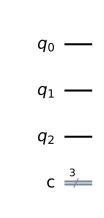

In [1]:
from qiskit import QuantumCircuit
# 量子ビット3個と古典ビット3個で量子回路を作る
# （なぜ古典ビットが必要なのかは後で説明する）
qc = QuantumCircuit(3, 3)
qc.draw()  # 回路図を返す

最後に <code>qc.draw()</code> メソッドは私たちのために回路の図面を作成してくれます。Jupyter Notebookはコードのセルの最終行を評価し、セルの下に表示します。 <code>qc.draw()</code> は図面を [返す](gloss:return) ので、コードの下に表示されるのは図面です。この回路にはまだゲートがないので、いくつかの水平線が見えるだけです。

<!-- ::: q-block.reminder -->

### 備考

<details>
    <summary>Pythonの基本（メソッドって何？）</summary>     
    <code>QuantumCircuit</code> クラスは量子回路をビットで表現するための命令セットですが、これらの回路の1つを変更したいとき、それに応じてビットを変更する方法も知っておく必要があります。 [Python](gloss:python) では、オブジェクトに「メソッド」が付属しており、これはそのオブジェクトに対して何かを行うための命令セットです。上のセルでは、 <code>.draw()</code> メソッドは作成した回路を見て、その回路の人間が読める図面を作成します。

</details>

<!-- ::: -->

次に、量子コンピューターに量子ビットを測定させて、結果を記録するように指示する方法が必要です。これを行うには、量子回路に「measure」演算を追加します。これは `QuantumCircuit` の `.measure()` メソッドで行うことができます

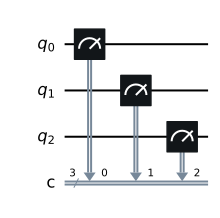

In [2]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3, 3)
# 量子ビット0, 1, 2をそれぞれ古典ビット0, 1, 2に測定する
qc.measure([0,1,2], [0,1,2])
qc.draw()

次に、この回路を実行した結果がどうなるかを見てみましょう。これを行うには、量子シミュレーターを使用します。これは、理想的な量子コンピューターが何をするかを計算する標準的なコンピューターです。

量子コンピュータのシミュレーションは、古典的なコンピュータでは困難とされているため（現在ある最良のアルゴリズムは、量子ビットの数に応じて指数関数的に増大する）、これらのシミュレーションは、量子ビットの数が少ない回路（最大30量子ビット）か、シミュレーションの速度を上げるために何らかの工夫ができる特定の種類の回路でのみ可能です。シミュレーターは、小さな量子回路を設計するのに非常に有効なツールです。

Qiskitの（Aerと呼ばれる）シミュレーターをインポートし、新しいシミュレーターオブジェクトを作りましょう。

In [3]:
from qiskit.providers.aer import AerSimulator  # pylint: disable=import-error, no-name-in-module
sim = AerSimulator()  # make new simulator object

シミュレーションを行うには、シミュレータの<code>.run()</code>メソッドを使用します。このメソッドは "job" を返します。この中には、実験に関する情報、例えば実験が実行中か完了したか、どのバックエンドで実験を行ったか、そして私たちにとって重要なことに、実験の結果はどうなったか、などが含まれています。

ジョブの結果を得るには、resultsメソッドを使います。resultsメソッドは、「counts」の辞書として表示するのが最も一般的な方法です。

In [4]:
job = sim.run(qc)      # 実験を行う
result = job.result()  # 結果を得る
result.get_counts()    # 結果を「counts」の辞書として解釈する

{'000': 1024}

counts辞書のキーはビット列で、値はそのビットの文字列を測定した回数である。量子コンピューターは結果にランダム性があるため、何度か回路を繰り返すのが一般的です。この回路は1024回繰り返されましたが、これはQiskitのデフォルトの回路繰り返し回数です。慣習により、量子ビットは常に`0`の状態で始まり、測定前に何もしていないので、結果は常に`0`です。

### 入力をエンコードする

では、入力として異なるバイナリー文字列をエンコードする方法を見てみましょう。これには、NOTゲートと呼ばれるものが必要です。これは、コンピューターでできる最も基本的な操作です。量子ビットの場合は、*Xゲート*と呼ばれるゲートがこれにあたります。

以下、エンコードに特化した回路を新たに作成します。

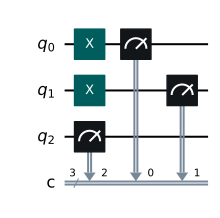

In [5]:
# 量子ビット3個と古典ビット3個で量子回路を作成する。
qc = QuantumCircuit(3, 3)
qc.x([0,1])  # 量子ビット0と1にXゲートを適用する
qc.measure([0,1,2], [0,1,2])
qc.draw()    # 回路図を返す

そして、回路をシミュレートして結果を見てみましょう。

In [6]:
job = sim.run(qc)      # 実験を行う
result = job.result()  # 結果を得る
result.get_counts()    # 結果を「counts」の辞書として解釈する

{'011': 1024}

<!-- ::: q-block.exercise -->

### クイッククイズ

<!-- ::: q-quiz(goal="intro-aoc-2") -->

<!-- ::: .question -->

2進数の`011`は10進数で何であるか？

<!-- ::: -->

<!-- ::: .option -->

1. 5

<!-- ::: -->

<!-- ::: .option -->

1. 2

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 3

<!-- ::: -->

<!-- ::: -->

上のコードを修正して、数字の6と4をエンコードする量子回路を作ってみよ。結果は予想通りか？

<!-- ::: -->

さて、コンピューターの中で情報をエンコードする方法はわかりました。次のステップは、情報を処理することです。エンコードした入力を、何か新しいことを教えてくれる出力に変えることです。

## 足し算回路を作成する

### どうやって足すかを思い出す

入力を出力に変えることを見るには、解くべき問題が必要です。基本的な数学をやってみましょう。小学校では、大きな数学の問題を扱いやすい大きさに分解する方法を習ったはずです。例えば、この足し算の問題はどのように解くのでしょうか？

<!-- ::: q-block -->

### どうやって足すかを思い出す

<!-- ::: q-carousel -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/0/0.svg)

どうすれば、このような問題を解決できるのでしょうか。このカルーセルをクリックしてみてください。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/0/1.svg)

右から左へ一桁ずつやっていくのも一つの手です。つまり、3+4から始めるのです。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/0/2.svg)

そして、次に1+5。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/0/3.svg)

次に2+8。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/0/4.svg)

最後に9+1+1となり、答えが出ます。

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

これは単純な足し算に過ぎないかもしれませんが、すべてのアルゴリズムの背後にある原理を実証しています。アルゴリズムが数学的な問題を解くために設計されているか、テキストや画像を処理するために設計されているかに関わらず、私たちは常に大きなタスクを小さく単純なステップに分解しています。

コンピューターで実行するためには、アルゴリズムをできるだけ小さく、単純なステップにコンパイルする必要があります。どのようなものかというと、上の足し算の問題をもう一度、2進数でやってみましょう。

<!-- ::: q-block -->

### 2進数の足し算

<!-- ::: q-carousel -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/1/0.svg)

2番目の数字には、左側に余分な0がたくさんあることに注意してください。これは、2つの文字列の長さを同じにするためのものです。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/1/1.svg)

最初の課題は、右の列の1+0を行うことです。2進数では、他の数体系と同様に、答えは1です。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/1/2.svg)

2列目の0+1についても同じ結果が得られます。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/1/3.svg)

次に、1+1です。ご存知のように、1+1=2です。2進数では、2は10と書くので、2ビットが必要です。つまり、10進数の10と同じように、1を繰り上げる必要があるのです。次の列では、1+1+1を計算する必要があります。これは、3つの数字を足すことになるので、コンピューターにとっては複雑な処理になります。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/1/4.svg)

しかし、もっと単純な演算に落とし込んで、2ビットの足し算だけで済ませることも可能です。この場合、最初の2つの1だけから始めることができます。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/1/5.svg)

この10を最後の1に足すのですが、これはいつものように列を順番に見ていく方法でできます。最終的な答えは、11（または3）です。

<!-- ::: -->

<!-- ::: div -->

![足し算の画像](images/aoc/carousel/1/6.svg)

さて、問題の続きに戻りましょう。答えが11なので、キャリービットがもう1つあります。つまり、ここで1+1+1をしなければならないのです。しかし、その方法はすでに知っているので、たいしたことではありません。

<!-- ::: -->

<!-- ::: div -->

実は、ここまでで残っているものはすべて、すでにやり方を知っているものばかりです。なぜなら、すべてを2ビットの足し算に分解すると、計算が必要になるのは4つだけだからです。以下は、その4つの基本的な和です（一貫性を持たせるために、答えはすべて2ビットで書きます）。

![足し算の画像](images/aoc/carousel/1/7.svg)

これを半加算器といいます。もし私たちのコンピューターがこれを実装し、たくさん連鎖させることができれば、何でも足すことができます。

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

### 量子回路の足し算

量子回路から半加算器を自作してみよう。この回路には、入力をエンコードする部分、アルゴリズムを実行する部分、結果を取り出す部分が含まれます。最初の部分は、新しい入力を使うたびに変更する必要がありますが、残りの部分は常に同じです。

![加算回路の概要](images/aoc/half-adder.svg)

足したい2つのビットは、量子ビット0と1にエンコードされています。上の例では、これらの量子ビットの両方に1がエンコードされているため、1+1の解を求めようとします。結果は2ビットの文字列となり、これを量子ビット2と3から読み取ります。あとは、真ん中の空白部分にある実際のプログラムを埋めるだけです。

画像の破線は、回路の各パーツを区別するためのものです（もっと面白い使い方もありますが）。

コンピューターの基本的な演算は論理ゲートと呼ばれます。私たちはすでにNOTゲートを使っていますが、これだけでは半加算器を作ることはできません。これでは、手計算で答えを出すしかありません。実際の計算をコンピューターにやってもらうためには、もっと強力なゲートが必要です。

必要なものを確認するために、半加算器に必要なものをもう一度見てみましょう。

![半加算器の必要な演算](images/aoc/half_adder_reqs.svg)

これらの4つの答えの右端のビットは、足し合わせる2つのビットが同じか異なるかによって完全に決まります。0+0と1+1では、2つのビットが等しいので、答えの右端のビットは0となり、0+1と1+0では、異なるビットの値を足しているので、右端のビットは1になります。

この部分を正しく理解するためには、2つのビットが異なるかどうかを判断できるものが必要です。従来、デジタル計算の分野では、これをXORゲートと呼びます。

<table>
<thead>
  <tr>
    <th>入力1</th>
    <th>入力2</th>
    <th>XORの出力</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td>
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td>
    <td>0</td>
  </tr>
</tbody>
</table>

量子コンピューターでは、XORゲートの仕事は「制御NOTゲート」が担っています。かなり長い名前なので、通常は「CNOT」とだけ呼びます。回路図では、下の図のように描かれています。これは、量子ビットのペアに適用されます。一つは制御量子ビットとして働きます（これは小さな点がある方です）。もう一方はターゲット量子ビット（大きな丸と十字、ターゲットマークのようなもの）として機能します。

![CNOTゲートの画像](images/aoc/cnot_xor.svg)

Qiskitでは、`.cx()`メソッドを使って回路にCNOTを追加することができます。それが作用する2つの量子ビットの添字を引数として与える必要があります。以下はその例です。

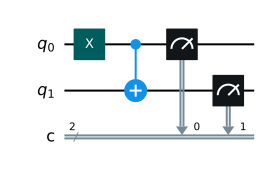

Result:  {'11': 1024}


In [7]:
# 2量子ビットと2古典ビットからなる量子回路を作る
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # 量子ビット0によって制御され、量子ビット1を標的とするCNOT
qc.measure([0,1], [0,1])
display(qc.draw())     # 回路図を表示する

job = sim.run(qc)      # 実験を行う
result = job.result()  # 結果を得る
# 結果を「counts」の辞書として解釈する
print("Result: ", result.get_counts())

私たちの半加算器では、入力の1つを上書きしたくありません。その代わり、結果を別の量子ビットのペアに書きたいと思います。そのためには、2つのCNOTを使い、出力を新しい量子ビットに書き込めばよいのですが、この量子ビットは状態が0になることが分かっています。

![2つのCNOTを使用してXORゲートを作成する回路図](images/aoc/xor.svg)

これで半加算器の完成まであと半分です。右端の出力ビットの計算方法はわかっているので、あとは左端の出力ビットをどう計算するかです。4つの和をもう一度見てみると、0でなく1になるケースが1つだけあることに気がつきます。これは、足し合わせるビットが両方とも1であるときだけ起こります。

![半加算器の必要な演算](images/aoc/half_adder_reqs.svg)

この部分を計算するために、コンピューターに両方の入力が1であるかどうかを調べさせることができます。もし両方が1であれば、そして両方が1である場合のみ、量子ビット3に対してNOTゲートを行う必要があります。そうすれば、この場合のみ必要な値である1に反転し、必要な出力が得られます。

そのためには、新しいゲートが必要です。CNOTのようなものですが、1つではなく2つの量子ビットで制御されます。これは、両方の制御ビットが1であるときだけ、ターゲット量子ビットのNOTを実行します。この新しいゲートは、[トフォリ](gloss:toffoli)ゲートと呼ばれます。ブール論理ゲートに詳しい人のために説明すると、これは基本的にANDゲートです。

![半加算量子回路](images/aoc/ha_circuit.svg)

Qiskitでは、`.ccx()`メソッドを使ってこれを回路に追加することができます。そして完成です! 有名な数学の問題である1+1を計算する回路です。

<!-- ::: q-block.exercise -->

### 試してみよう

ブロックを並べて、上の半加算器回路を生成するコードブロックを作成します。

    q-drag-and-drop-code(goal="intro-aoc-3")
        .line from qiskit import QuantumCircuit
        .line qc = QuantumCircuit(4, 2)
        .line(group=0) qc.cx(0, 2)
        .line(group=0) qc.cx(1, 2)
        .line(group=0) qc.ccx(0, 1, 3) 
        .result-info

<!-- ::: -->

すごい！これで半加算器ができました。次に行うことは、それが機能することを確認することです。これを行うには、一部の入力をエンコードし、半加算器を適用して、出力を抽出する別の回路を作成します。 

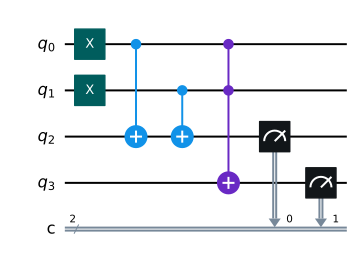

In [8]:
test_qc = QuantumCircuit(4, 2)

# まず、入力（ここでは'11'）をエンコードする必要がある
test_qc.x(0)
test_qc.x(1)

# 次に、作成した加算回路を実行する必要がある
test_qc.cx(0,2)
test_qc.cx(1,2)
test_qc.ccx(0,1,3)

# 最後に、下の2つの量子ビットを測定し、出力を抽出する
test_qc.measure(2,0)
test_qc.measure(3,1)
test_qc.draw()

In [9]:
job = sim.run(test_qc)  # 実験を行う
result = job.result()   # 結果を得る
result.get_counts()     # 結果を「counts」の辞書として解釈する

{'10': 1024}

ここでは、結果「10」が1024回測定され、それ以外の結果は測定していないことがわかります。

<!-- ::: q-block.exercise -->

### 練習問題

半加算回路が4つの可能な入力すべてに対して動作することを確認せよ。

[IBM Quantum Labで試す](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

半加算器には、足し算に必要なものがすべて入っています。NOTゲート、CNOTゲート、Toffoliゲートを使えば、どんな大きさの数の集合でも足し算をするプログラムを作ることができます。

この3つのゲートで、計算の他のすべてのこともできるのです。実際は、CNOTがなくても大丈夫です。さらに、NOTゲートは値1のビットを生成するのに必要なだけです。Toffoliゲートは、本質的に数学の原子です。最も単純な要素であり、そこから他のあらゆる問題解決技法を組み合わせることができます。